In [1]:
import pandas as pd
import pptx
from IPython.display import FileLink

## Loading all text

In [3]:
from pptx import Presentation

prs = Presentation(r'C:\Users\idogil\PycharmProjects\Gong_Slides\original_presentations\Gong Sample Deck Slides with Placeholders Template.pptx')

# text_runs will be populated with a list of strings,
# one for each text run in presentation

text_runs = []

for slide in prs.slides:
    for shape in slide.shapes:
        if not shape.has_text_frame:
            continue
        for paragraph in shape.text_frame.paragraphs:
            for run in paragraph.runs:
                text_runs.append(run.text)

In [7]:
import pandas as pd

# Function to replace text with PLACEHOLDER if it's wrapped in [[]], [] or {}
def replace_placeholders(presentation):
    for slide in presentation.slides:
        
        for shape in slide.shapes:
            if not shape.has_text_frame:
                continue
            
            for paragraph in shape.text_frame.paragraphs:
                paragraph_text = paragraph.text
                
                # Check if the entire paragraph is a placeholder
                if (paragraph_text.strip().startswith('[') and paragraph_text.strip().endswith(']')) or \
                   (paragraph_text.strip().startswith('[[') and paragraph_text.strip().endswith(']]')) or \
                   (paragraph_text.strip().startswith('{') and paragraph_text.strip().endswith('}')):
                    # Clear existing runs
                    for idx in range(len(paragraph.runs)):
                        if idx == 0:
                            paragraph.runs[0].text = "PLACEHOLDER"
                        else:
                            paragraph.runs[idx].text = ""
                else:
                    # Check for placeholders within the text
                    import re
                    # Patterns for all three types of placeholders
                    placeholder_patterns = [
                        r'\[.*?\]',       # [text]
                        r'\[\[.*?\]\]',   # [[text]]
                        r'\{.*?\}'        # {text}
                    ]
                    
                    # Process each run in the paragraph
                    for run in paragraph.runs:
                        run_text = run.text
                        if any(char in run_text for char in ['[', '{', '}']):
                            # Replace all instances of placeholders with PLACEHOLDER
                            modified_text = run_text
                            for pattern in placeholder_patterns:
                                modified_text = re.sub(pattern, 'PLACEHOLDER', modified_text)
                            run.text = modified_text

# Create a copy of the presentation with placeholders
prs_with_placeholders = Presentation(r'C:\Users\idogil\PycharmProjects\Gong_Slides\original_presentations\Gong Sample Deck Slides with Placeholders Template.pptx')

# Replace placeholders in the presentation
replace_placeholders(prs_with_placeholders)

# Save the modified presentation
prs_with_placeholders.save(r'modified_presentations\prs_with_placeholder.pptx')

# Display a message confirming the save
print("Presentation saved with placeholders as 'prs_with_placeholder.pptx'")

# For visualization, extract the text to show the changes
def extract_formatted_text(presentation):
    all_text_boxes = []
    
    for slide_index, slide in enumerate(presentation.slides):
        slide_text_boxes = []
        
        for shape in slide.shapes:
            if not shape.has_text_frame:
                continue
            
            # Process each paragraph in the text frame
            paragraphs_text = []
            current_text_block = []
            
            for paragraph in shape.text_frame.paragraphs:
                paragraph_text = paragraph.text.strip()
                
                # If empty paragraph, might indicate a line break
                if not paragraph_text:
                    # If we have accumulated text, add it as a text box and reset
                    if current_text_block:
                        paragraphs_text.append('\n'.join(current_text_block))
                        current_text_block = []
                else:
                    current_text_block.append(paragraph_text)
            
            # Add any remaining text
            if current_text_block:
                paragraphs_text.append('\n'.join(current_text_block))
            
            # Add all text blocks from this shape
            slide_text_boxes.extend(paragraphs_text)
        
        all_text_boxes.append({
            'slide_index': slide_index + 1,
            'text_boxes': slide_text_boxes
        })
    
    return all_text_boxes

# Create a DataFrame to visualize the modified text
text_df = pd.DataFrame([
    {'Slide': item['slide_index'], 'Text Box': i+1, 'Content': content}
    for item in extract_formatted_text(prs_with_placeholders)
    for i, content in enumerate(item['text_boxes'])
])

# Display a sample of the modified text
if len(text_df) > 10:
    text_df.iloc[10,2]
else:
    text_df.head()


Presentation saved with placeholders as 'prs_with_placeholder.pptx'


In [39]:
text_df

,Slide,Text Box,Content
0,1,1,EXECUTIVE SUMMARY
1,1,2,UPLEVEL UPLEVEL SKILLS\n(People Intelligence)
2,1,3,KPI: Increasing % reps hitting annual quota
3,1,4,IMPROVE FORECASTING ACCURACY\n(Deal Intellige...
4,1,5,KPI: % deviance between forecast and actual
5,1,6,INCREASE CONVERSION RATES\n(Deal Intelligence)
6,1,7,KPI: % increase in conversion rates during _xx...
7,1,8,Business Objectives
8,1,9,EXPAND MARKET PRESENCE\n(Market Intelligence)
9,1,10,KPI: Penetration into new markets outside of p...


In [22]:
prs.slide_masters[0].

pptx.slide.SlideMaster

In [6]:
text_runs

['EXECUTIVE SUMMARY',
 '',
 '',
 '',
 'UPLEVEL UPLEVEL SKILLS',
 '(People Intelligence)',
 '',
 'KPI: ',
 'Increasing % reps hitting annual quota',
 '',
 'IMPROVE FORECASTING ACCURACY',
 '(Deal  Intelligence)',
 '',
 'KPI: ',
 '% deviance between forecast and actual ',
 '',
 'INCREASE CONVERSION RATES',
 '(Deal  Intelligence)',
 '',
 'KPI: ',
 '% increase in',
 ' ',
 'conversion rates during _xx_ sales stage ',
 '(',
 'please define',
 ')',
 '',
 '',
 'Business Objectives',
 'EXPAND MARKET PRESENCE',
 '(Market Intelligence)',
 '',
 'KPI: ',
 'Penetration into new markets outside of previous status quo',
 '',
 '[[Insert Key Business Priority]] ',
 'Empower to Unlock Reality for [[ACCOUNT]]',
 'Resources on How to Present',
 '[[If Applicable : Create A Deal Board]',
 'INSERT Gong.io Customer Program Manager ',
 'EMPOWERMENT',
 '',
 'Uncover why Enterprise Deals are Stalling ',
 'Improve Discovery ',
 'Surface risk for renewal ',
 '',
 '',
 'Template Slide Pick One ',
 '',
 'INSERT Gong.i

## printing options

In [4]:
# Save your presentation first
prs.save('example.pptx')

# Display a clickable link to download your presentation
display(FileLink('example.pptx'))

c:\Users\idogil\PycharmProjects\Gong_Slides\example.pptx

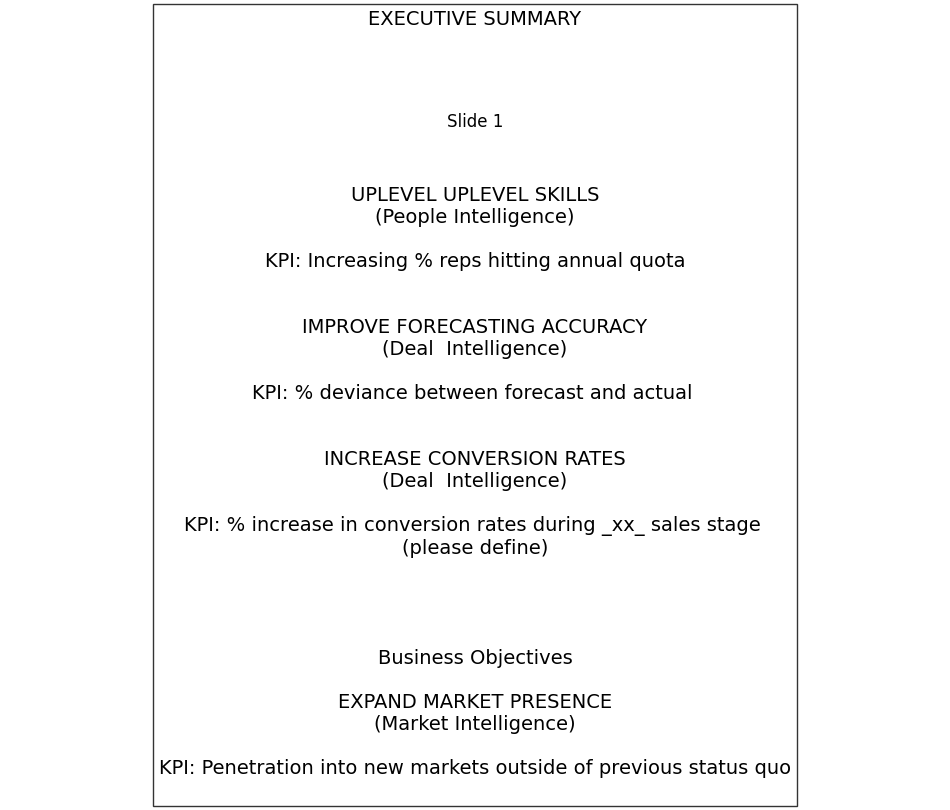

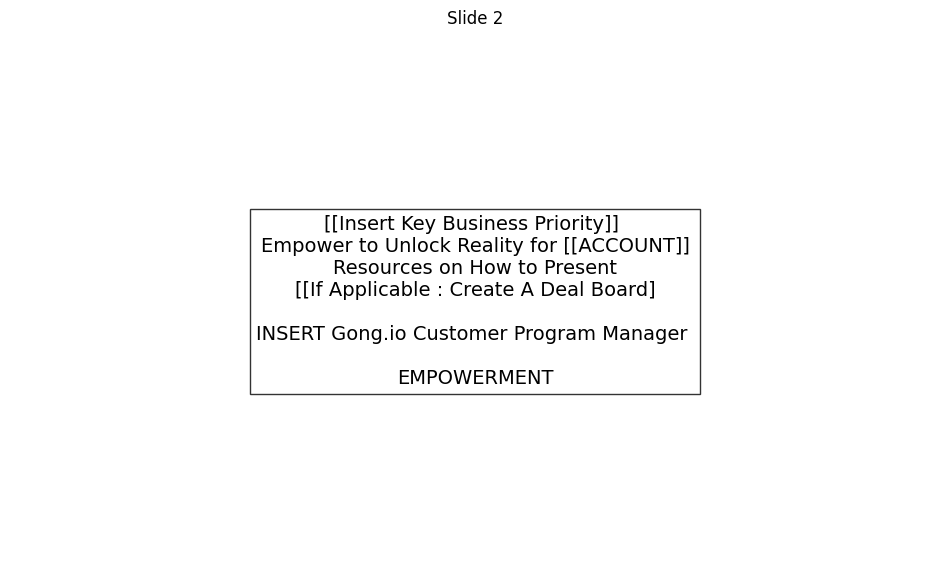

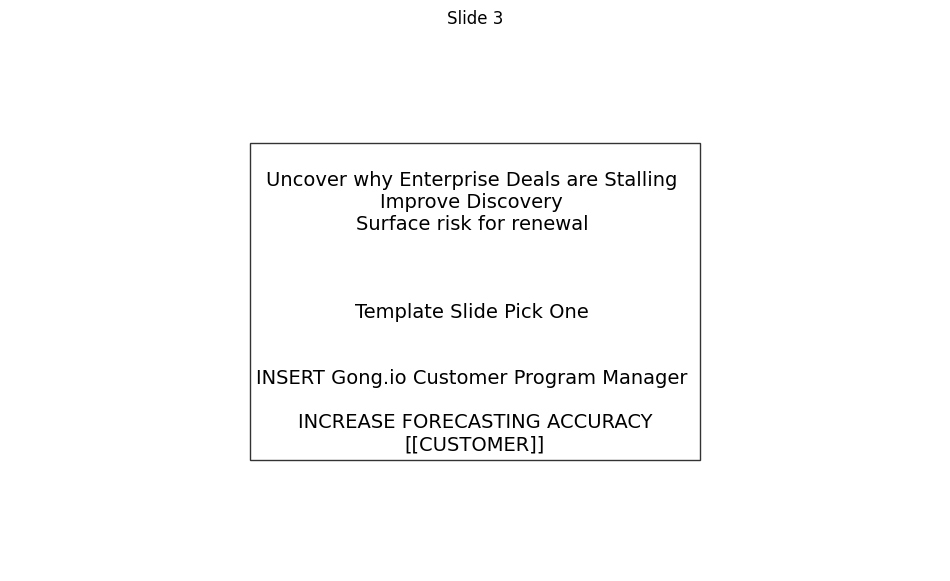

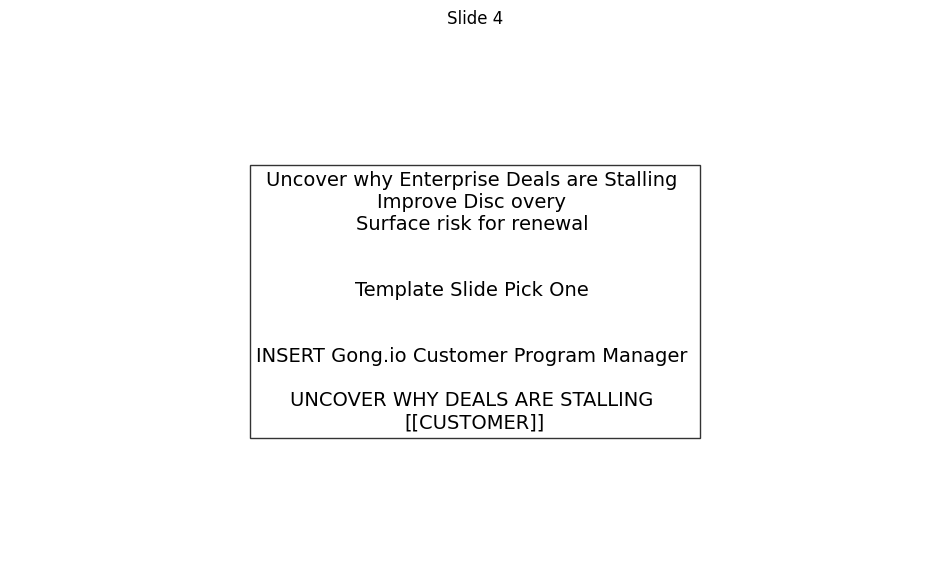

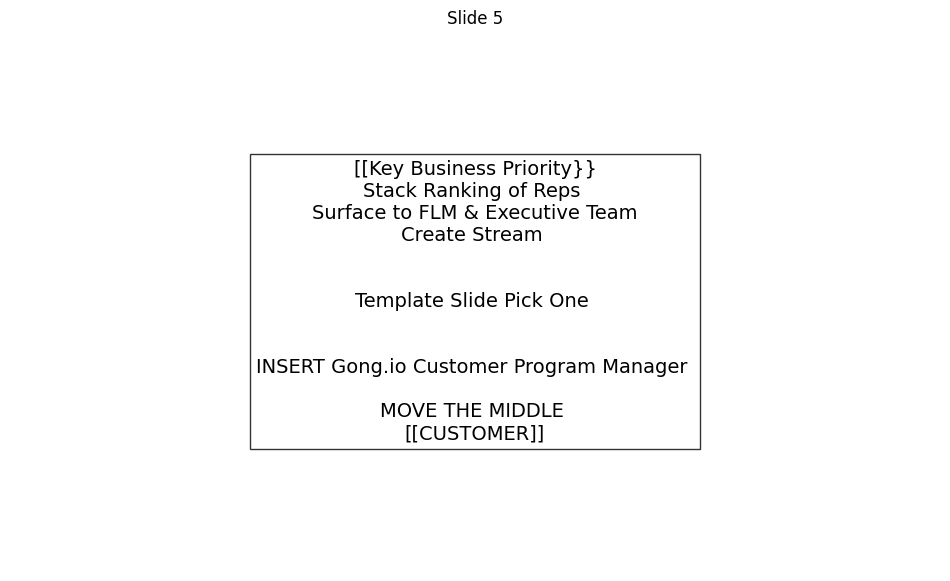

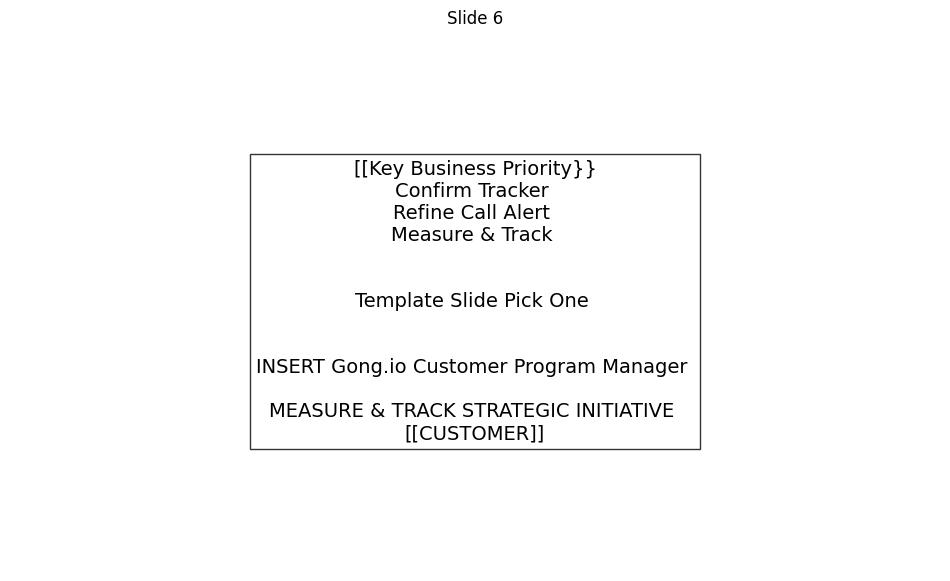

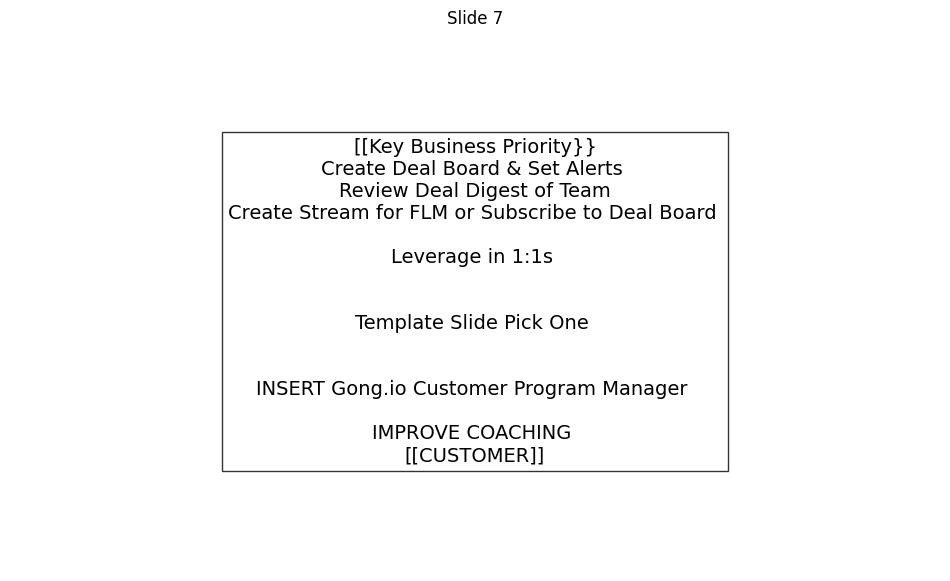

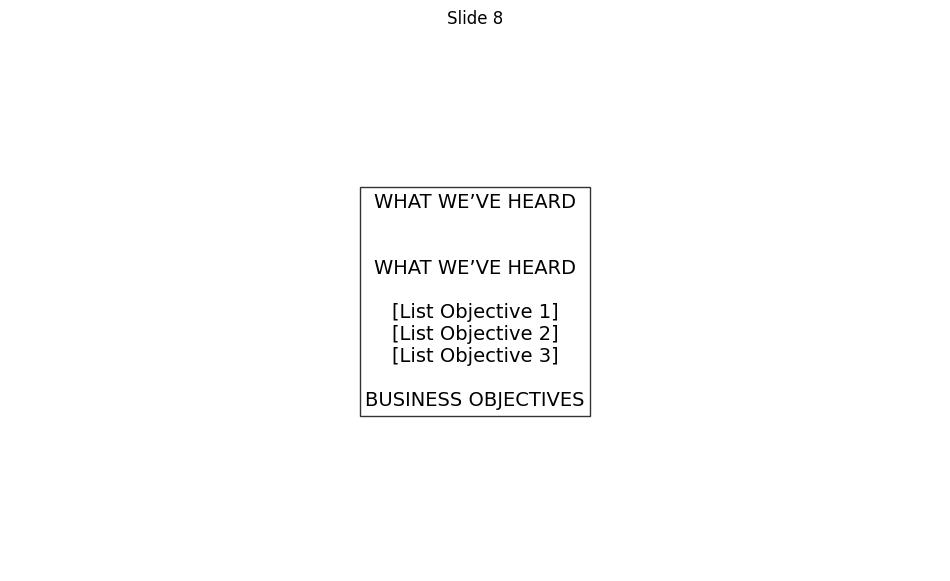

In [6]:
from pptx import Presentation
import matplotlib.pyplot as plt

# Extract text from each slide and display it
for idx, slide in enumerate(prs.slides):
    slide_text = []
    for shape in slide.shapes:
        if hasattr(shape, "text"):
            slide_text.append(shape.text)

    full_text = "\n\n".join(slide_text)

    # Plot slide text using matplotlib
    plt.figure(figsize=(12, 7))
    plt.text(0.5, 0.5, full_text,
             fontsize=14, ha='center', va='center',
             wrap=True, bbox=dict(facecolor='white', alpha=0.8))

    plt.title(f'Slide {idx + 1}')
    plt.axis('off')
    plt.show()


In [5]:
# Display all slides in the presentation
print(f"Total slides: {len(prs.slides)}")

# Examine slide layouts
for i, slide in enumerate(prs.slides):
    print(f"\nSlide {i+1}:")
    
    # Print slide layout information
    layout = slide.slide_layout
    print(f"Layout: {layout}")
    
    # Print text content from shapes
    for shape in slide.shapes:
        if hasattr(shape, "text") and shape.text:
            print(f"  • {shape.text.strip()}")
    
    # Print placeholder information
    placeholders = [p for p in slide.placeholders]
    if placeholders:
        print(f"  Placeholders: {len(placeholders)}")
        for p in placeholders:
            print(f"    - {p.placeholder_format.type} (idx: {p.placeholder_format.idx}): {p.text.strip() if hasattr(p, 'text') else 'No text'}")


Total slides: 13

Slide 1:
Layout: <pptx.slide.SlideLayout object at 0x00000272733CE1C0>
  • Basic presentation
  Placeholders: 1
    - CENTER_TITLE (3) (idx: 0): Basic presentation

Slide 2:
Layout: <pptx.slide.SlideLayout object at 0x00000272733CC7C0>
  • Agenda
  • Introduction
Building confidence
Engaging the audience
Visual aids
Final tips & takeaways
  • 2
  Placeholders: 3
    - TITLE (1) (idx: 0): Agenda
    - SLIDE_NUMBER (13) (idx: 12): 2
    - OBJECT (7) (idx: 14): Introduction
Building confidence
Engaging the audience
Visual aids
Final tips & takeaways

Slide 3:
Layout: <pptx.slide.SlideLayout object at 0x00000272751DAEB0>
  • The power of communication
  Placeholders: 2
    - CENTER_TITLE (3) (idx: 0): The power of communication
    - PICTURE (18) (idx: 13): No text

Slide 4:
Layout: <pptx.slide.SlideLayout object at 0x0000027252C0B040>
  • Overcoming nervousness​
  • Confidence-building strategies
  Placeholders: 3
    - CENTER_TITLE (3) (idx: 0): Overcoming nervousness​


## selective slide process - requires layout

In [15]:
# Process only specific slides (e.g., slides 1, 3, and 5)
selected_slide_indices = [0, 2, 4]  # 0-indexed (corresponds to slides 1, 3, and 5)

# Create a copy of the presentation with only selected slides
prs_copy = Presentation()

print("Processing selected slides only:")
for idx in selected_slide_indices:
    if idx < len(prs.slides):
        slide = prs.slides[idx]
        print(f"\nSlide {idx + 1}:")
        
        # Extract text from the slide
        slide_text = []
        for shape in slide.shapes:
            if hasattr(shape, "text") and shape.text.strip():
                slide_text.append(shape.text.strip())
                print(f"  • {shape.text.strip()}")
        
        # Display placeholders for the selected slide
        placeholders = [p for p in slide.placeholders]
        if placeholders:
            print(f"  Placeholders: {len(placeholders)}")
            for p in placeholders:
                print(f"    - {p.placeholder_format.type} (idx: {p.placeholder_format.idx}): {p.text.strip() if hasattr(p, 'text') else 'No text'}")
        
        # Add this slide to the new presentation
        # Find a matching layout in the target presentation
        target_layout = None
        for layout_idx, layout in enumerate(prs_copy.slide_layouts):
            # You can add more criteria to find the best matching layout
            if layout.name == slide.slide_layout.name:
                target_layout = layout
                break
        
        # If no matching layout found, use the first available layout
        if target_layout is None:
            target_layout = prs_copy.slide_layouts[0]
            
        new_slide = prs_copy.slides.add_slide(target_layout)
        
        # Copy shapes from original slide to new slide
        for shape in slide.shapes:
            # Check if the shape has text
            if hasattr(shape, "text") and shape.text.strip():
                # Try to find a matching placeholder in the new slide
                for placeholder in new_slide.placeholders:
                    # Check if the shape is a placeholder before accessing placeholder_format
                    try:
                        if hasattr(shape, "placeholder_format") and placeholder.placeholder_format.idx == shape.placeholder_format.idx:
                            placeholder.text = shape.text
                    except ValueError:
                        # Skip shapes that are not placeholders
                        continue
    else:
        print(f"Slide {idx + 1} does not exist in the presentation")

# Save the new presentation with only selected slides
prs_copy.save("selected_slides.pptx")
print("\nCreated new presentation with only selected slides: selected_slides.pptx")


Processing selected slides only:

Slide 1:
  • Basic presentation
  Placeholders: 1
    - CENTER_TITLE (3) (idx: 0): Basic presentation

Slide 3:
  • The power of communication
  Placeholders: 2
    - CENTER_TITLE (3) (idx: 0): The power of communication
    - PICTURE (18) (idx: 13): No text

Slide 5:
  • Engaging the audience
  • Make eye contact with your audience to create a sense of intimacy and involvement
Weave relatable stories into your presentation using narratives that make your message memorable and impactful
Encourage questions and provide thoughtful responses to enhance audience participation
Use live polls or surveys to gather audience opinions, promoting engagement and making sure the audience feel involved
  • 5
  Placeholders: 3
    - TITLE (1) (idx: 0): Engaging the audience
    - SLIDE_NUMBER (13) (idx: 12): 5
    - OBJECT (7) (idx: 14): Make eye contact with your audience to create a sense of intimacy and involvement
Weave relatable stories into your presentation us

## list of layounts

In [24]:
from pptx import Presentation

for idx, layout in enumerate(prs.slide_layouts):
    print(f"Layout {idx}: {layout.name}")


Layout 0: Title Only
Layout 1: Content 3
Layout 2: Title + Picture
Layout 3: Title + Subtitle + Picture 
Layout 4: Content 1
Layout 5: Title + Subtitle
Layout 6: Two Content 1
Layout 7: Two Content 2
Layout 8: Content + Picture
Layout 9: Content + Table
Layout 10: Two Content 3
Layout 11: Table
Layout 12: Content 2


## list of placeholders

In [34]:
from pptx import Presentation

for i, layout in enumerate(prs.slide_layouts):
    print(f'slide {i+1}')
    print(f'Placeholders in this layout: {layout.name}')
    for shape in layout.placeholders:
        print(f"Placeholder index: {shape.placeholder_format.idx}, Type: {shape.placeholder_format.type}")
    print('--------------------------------')


slide 1
Placeholders in this layout: Title Only
Placeholder index: 0, Type: CENTER_TITLE (3)
--------------------------------
slide 2
Placeholders in this layout: Content 3
Placeholder index: 0, Type: TITLE (1)
Placeholder index: 14, Type: OBJECT (7)
Placeholder index: 11, Type: FOOTER (15)
Placeholder index: 12, Type: SLIDE_NUMBER (13)
Placeholder index: 10, Type: DATE (16)
--------------------------------
slide 3
Placeholders in this layout: Title + Picture
Placeholder index: 0, Type: CENTER_TITLE (3)
Placeholder index: 13, Type: PICTURE (18)
--------------------------------
slide 4
Placeholders in this layout: Title + Subtitle + Picture 
Placeholder index: 0, Type: CENTER_TITLE (3)
Placeholder index: 1, Type: SUBTITLE (4)
Placeholder index: 13, Type: PICTURE (18)
--------------------------------
slide 5
Placeholders in this layout: Content 1
Placeholder index: 0, Type: TITLE (1)
Placeholder index: 10, Type: DATE (16)
Placeholder index: 11, Type: FOOTER (15)
Placeholder index: 12, Ty

## doing the same in google slides does not require layouts (w/o running) but needs credentials and allowing API

In [ ]:
from google.oauth2.credentials import Credentials
from googleapiclient.discovery import build
from google.oauth2 import service_account

# Set up Google Slides API credentials
SCOPES = ['https://www.googleapis.com/auth/presentations']
SERVICE_ACCOUNT_FILE = 'path/to/your/service-account-key.json'

credentials = service_account.Credentials.from_service_account_file(
    SERVICE_ACCOUNT_FILE, scopes=SCOPES)
slides_service = build('slides', 'v1', credentials=credentials)

def copy_selected_slides(source_presentation_id, selected_slide_indices):
    # Create a new presentation
    presentation_metadata = {
        'title': 'Selected Slides Copy'
    }
    new_presentation = slides_service.presentations().create(
        body=presentation_metadata).execute()
    new_presentation_id = new_presentation['presentationId']
    
    # Get the source presentation
    presentation = slides_service.presentations().get(
        presentationId=source_presentation_id).execute()
    slides = presentation.get('slides', [])
    
    print("Processing selected slides only:")
    requests = []
    
    for idx in selected_slide_indices:
        if idx < len(slides):
            print(f"\nSlide {idx + 1}:")
            
            # Create a copy request for the slide
            requests.append({
                'duplicateObject': {
                    'objectId': slides[idx]['objectId'],
                    'objectIds': {
                        slides[idx]['objectId']: f'copied_slide_{idx}'
                    }
                }
            })
            
            # Print slide content (text elements)
            elements = slides[idx].get('pageElements', [])
            for element in elements:
                if 'shape' in element and 'text' in element['shape']:
                    text_content = ''
                    for textElement in element['shape']['text'].get('textElements', []):
                        if 'textRun' in textElement:
                            text_content += textElement['textRun'].get('content', '')
                    if text_content.strip():
                        print(f"  • {text_content.strip()}")
        else:
            print(f"Slide {idx + 1} does not exist in the presentation")
    
    # Execute the requests to copy slides
    if requests:
        slides_service.presentations().batchUpdate(
            presentationId=new_presentation_id,
            body={'requests': requests}
        ).execute()
    
    print(f"\nCreated new presentation with only selected slides. Presentation ID: {new_presentation_id}")
    return new_presentation_id

# Example usage
source_presentation_id = 'YOUR_SOURCE_PRESENTATION_ID'
selected_slide_indices = [0, 2, 4]  # 0-indexed (corresponds to slides 1, 3, and 5)
new_presentation_id = copy_selected_slides(source_presentation_id, selected_slide_indices)

## Pros n Cons by chatGPT

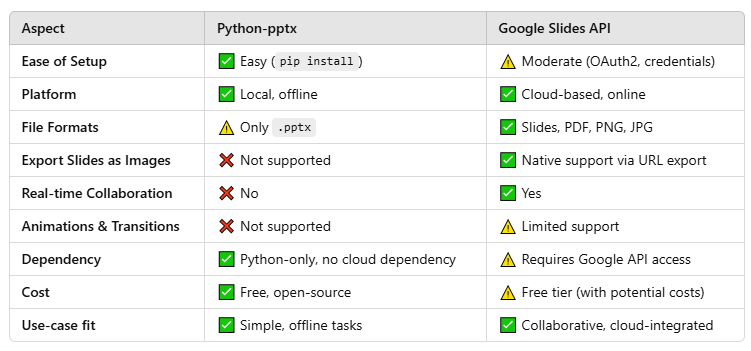

In [21]:
from IPython.display import Image
display(Image('prosncons.PNG'))


In [35]:
# ## Replace Text in PowerPoint Presentation

import pptx
from pptx import Presentation
import os

def replace_text_in_presentation(input_file, output_file, replacements):
    """
    Replace text in a PowerPoint presentation and save as a new file.
    
    Args:
        input_file (str): Path to the input PowerPoint file
        output_file (str): Path to save the modified presentation
        replacements (dict): Dictionary of {old_text: new_text} pairs
    """
    # Load the presentation
    prs = Presentation(input_file)
    
    # Track if any replacements were made
    replacements_made = False
    
    # Go through all slides
    for slide in prs.slides:
        # Go through all shapes in the slide
        for shape in slide.shapes:
            # Check if the shape has a text frame
            if hasattr(shape, "text_frame") and shape.text_frame:
                # Go through all paragraphs in the text frame
                for paragraph in shape.text_frame.paragraphs:
                    # Go through all runs in the paragraph
                    for run in paragraph.runs:
                        # Check if the run's text matches any of our replacement keys
                        for old_text, new_text in replacements.items():
                            if old_text in run.text:
                                run.text = run.text.replace(old_text, new_text)
                                replacements_made = True
    
    # Save the modified presentation
    prs.save(output_file)
    
    return replacements_made

# Example usage
input_file = "basic presentation.pptx"
output_file = "basic presentation_modified.pptx"

# Define text replacements
replacements = {
    "Introduction": "Project Overview",
    "Building confidence": "Key Results",
    "Engaging the audience": "Next Steps"
}

# Replace text and save as a new file
if os.path.exists(input_file):
    success = replace_text_in_presentation(input_file, output_file, replacements)
    if success:
        print(f"Text replaced successfully. Modified presentation saved as '{output_file}'")
    else:
        print("No matching text found for replacement")
else:
    print(f"Input file '{input_file}' not found")


Text replaced successfully. Modified presentation saved as 'basic presentation_modified.pptx'


In [36]:
from pptx import Presentation

prs = Presentation(r'basic presentation_modified.pptx')

# text_runs will be populated with a list of strings,
# one for each text run in presentation
text_runs = []

for slide in prs.slides:
    for shape in slide.shapes:
        if not shape.has_text_frame:
            continue
        for paragraph in shape.text_frame.paragraphs:
            for run in paragraph.runs:
                text_runs.append(run.text)

In [37]:
text_runs[:5]

['Basic presentation',
 'Agenda',
 'Project Overview',
 'Key Results',
 'Next Steps']

successsful

In [42]:
# Function to replace text in a specific placeholder
def replace_text_in_placeholder(presentation_path, output_path, slide_index, shape_index, new_text):
    """
    Replace text in a specific placeholder in a PowerPoint presentation.
    
    Args:
        presentation_path (str): Path to the input PowerPoint file
        output_path (str): Path to save the modified PowerPoint file
        slide_index (int): Index of the slide containing the placeholder (0-based)
        shape_index (int): Index of the shape/placeholder within the slide (0-based)
        new_text (str): New text to replace the existing text
    
    Returns:
        bool: True if replacement was successful, False otherwise
    """
    try:
        from pptx import Presentation
        
        # Load the presentation
        prs = Presentation(presentation_path)
        
        # Check if slide_index is valid
        if slide_index >= len(prs.slides) or slide_index < 0:
            print(f"Error: Slide index {slide_index} is out of range")
            return False
            
        slide = prs.slides[slide_index]
        
        # Check if shape_index is valid
        if shape_index >= len(slide.shapes) or shape_index < 0:
            print(f"Error: Shape index {shape_index} is out of range for slide {slide_index}")
            return False
            
        shape = slide.shapes[shape_index]
        
        # Check if the shape has a text frame
        if not shape.has_text_frame:
            print(f"Error: Shape at index {shape_index} on slide {slide_index} does not have text")
            return False
            
        # Replace the text
        for paragraph in shape.text_frame.paragraphs:
            for run in paragraph.runs:
                run.text = new_text
        
        # Save the modified presentation
        prs.save(output_path)
        return True
        
    except Exception as e:
        print(f"Error replacing text: {str(e)}")
        return False

# Example usage:
replace_text_in_placeholder('basic presentation.pptx', 'modified_presentation.pptx', 1, 0, 'check this')


True

In [45]:
from pptx import Presentation

prs = Presentation(r'modified_presentation.pptx')

# text_runs will be populated with a list of strings,
# one for each text run in presentation
text_runs = []

for slide in prs.slides:
    for shape in slide.shapes:
        if not shape.has_text_frame:
            continue
        for paragraph in shape.text_frame.paragraphs:
            for run in paragraph.runs:
                text_runs.append(run.text)

In [46]:
# check_this appeards in text_runs
text_runs[:5]

['Basic presentation',
 'check this',
 'Introduction',
 'Building confidence',
 'Engaging the audience']

In [48]:
## replace text in a google slide
from google.oauth2.credentials import Credentials
from googleapiclient.discovery import build
from google.oauth2 import service_account


# Define the scopes required for Google Slides API
SCOPES = ['https://www.googleapis.com/auth/presentations']

def replace_text_in_google_slide(presentation_id, slide_index, element_id, new_text, credentials_path):
    """
    Replace text in a Google Slides presentation.
    
    Args:
        presentation_id (str): The ID of the Google Slides presentation.
        slide_index (int): The index of the slide (0-based).
        element_id (str): The ID of the text element to modify.
        new_text (str): The new text to replace the existing text.
        credentials_path (str): Path to the service account credentials JSON file.
    
    Returns:
        bool: True if successful, False otherwise.
    """
    try:
        # Authenticate with service account
        credentials = service_account.Credentials.from_service_account_file(
            credentials_path, scopes=SCOPES)
        
        # Build the Slides API service
        service = build('slides', 'v1', credentials=credentials)
        
        # Create the text replacement request
        requests = [
            {
                'replaceAllText': {
                    'containsText': {
                        'text': '{{PLACEHOLDER}}',  # You can modify this to match specific text
                        'matchCase': True
                    },
                    'replaceText': new_text,
                    'pageObjectIds': [f'p{slide_index}']  # Limit to specific slide
                }
            }
        ]
        
        # If you have the specific element ID, you can use this approach instead:
        # requests = [
        #     {
        #         'updateTextStyle': {
        #             'objectId': element_id,
        #             'textRange': {
        #                 'type': 'ALL'
        #             },
        #             'style': {
        #                 'text': new_text
        #             },
        #             'fields': 'text'
        #         }
        #     }
        # ]
        
        # Execute the request
        response = service.presentations().batchUpdate(
            presentationId=presentation_id,
            body={'requests': requests}
        ).execute()
        
        print(f"Text replaced in Google Slides presentation: {presentation_id}")
        return True
        
    except Exception as e:
        print(f"Error replacing text in Google Slides: {str(e)}")
        return False

# Example usage:
# replace_text_in_google_slide(
#     'your-presentation-id',
#     0,  # First slide
#     'element-id',  # Optional: specific element ID
#     'New Text',
#     'path/to/credentials.json'
# )
